In [1]:
import matplotlib
import numpy as np
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

In [24]:
class GroverSearch:
    def __init__(self, n, indices_to_search):
        self.n = n
        self.indices_to_search = indices_to_search
        
    def groverOracle(self, indices_to_search):
        circ = QuantumCircuit(self.n, name="Grover Oracle")
        
        oracle_matrix = np.identity(2**n)
        for index_to_search in indices_to_search:
            oracle_matrix[index_to_search, index_to_search] = -1
        
        circ.unitary(Operator(oracle_matrix), range(self.n))
        
        return circ

    def diffusionOperator(self):
        
        circ = QuantumCircuit(self.n, name="Diffusion Operator")
        
        circ.h(range(self.n))
        circ.append(self.groverOracle([0]), range(self.n))
        circ.h(range(self.n))
        
        return circ
    
    def assembleCirc(self):
        grover_circ = QuantumCircuit(self.n, self.n)
        r = int(np.floor(np.pi/4*np.sqrt(2**n/len(self.indices_to_search))))
        print(f'{n} qubits, {self.indices_to_search} are marked, {r} iterations required')
        
        grover_circ.h(range(self.n))
        
        for _ in range(r):
            grover_circ.append(self.groverOracle(self.indices_to_search), range(self.n))
            grover_circ.append(self.diffusionOperator(), range(self.n))
        
        grover_circ.measure(range(self.n), range(self.n))
        
        return grover_circ

In [27]:
n = 6
search_list = [5, 42]
grover = GroverSearch(n, search_list).assembleCirc()
grover.draw(output='text')

6 qubits, [5, 42] are marked, 4 iterations required


┌───┐┌────────────────┐┌─────────────────────┐┌────────────────┐»
q_0: ┤ H ├┤0               ├┤0                    ├┤0               ├»
     ├───┤│                ││                     ││                │»
q_1: ┤ H ├┤1               ├┤1                    ├┤1               ├»
     ├───┤│                ││                     ││                │»
q_2: ┤ H ├┤2               ├┤2                    ├┤2               ├»
     ├───┤│  Grover Oracle ││  Diffusion Operator ││  Grover Oracle │»
q_3: ┤ H ├┤3               ├┤3                    ├┤3               ├»
     ├───┤│                ││                     ││                │»
q_4: ┤ H ├┤4               ├┤4                    ├┤4               ├»
     ├───┤│                ││                     ││                │»
q_5: ┤ H ├┤5               ├┤5                    ├┤5               ├»
     └───┘└────────────────┘└─────────────────────┘└────────────────┘»
c_0: ════════════════════════════════════════════════════════════════»
                                                                     »
c_1: ════════════════════════════════════════════════════════════════»
                                                                     »
c_2: ════════════════════════════════════════════════════════════════»
                                                                     »
c_3: ════════════════════════════════════════════════════════════════»
                                                                     »
c_4: ════════════════════════════════════════════════════════════════»
                                                                     »
c_5: ════════════════════════════════════════════════════════════════»
                                                                     »
«     ┌─────────────────────┐┌────────────────┐┌─────────────────────┐»
«q_0: ┤0                    ├┤0               ├┤0                    ├»
«     │                     ││                ││                     │»
«q_1: ┤1                    ├┤1               ├┤1                    ├»
«     │                     ││                ││                     │»
«q_2: ┤2                    ├┤2               ├┤2                    ├»
«     │  Diffusion Operator ││  Grover Oracle ││  Diffusion Operator │»
«q_3: ┤3                    ├┤3               ├┤3                    ├»
«     │                     ││                ││                     │»
«q_4: ┤4                    ├┤4               ├┤4                    ├»
«     │                     ││                ││                     │»
«q_5: ┤5                    ├┤5               ├┤5                    ├»
«     └─────────────────────┘└────────────────┘└─────────────────────┘»
«c_0: ════════════════════════════════════════════════════════════════»
«                                                                     »
«c_1: ════════════════════════════════════════════════════════════════»
«                                                                     »
«c_2: ════════════════════════════════════════════════════════════════»
«                                                                     »
«c_3: ════════════════════════════════════════════════════════════════»
«                                                                     »
«c_4: ════════════════════════════════════════════════════════════════»
«                                                                     »
«c_5: ════════════════════════════════════════════════════════════════»
«                                                                     »
«     ┌────────────────┐┌─────────────────────┐┌─┐               
«q_0: ┤0               ├┤0                    ├┤M├───────────────
«     │                ││                     │└╥┘┌─┐            
«q_1: ┤1               ├┤1                    ├─╫─┤M├────────────
«     │                ││                     │ ║ └╥┘┌─┐         
«q_2: ┤2               ├┤2                    ├─╫──╫─┤M├─────────
«     │  Grover Oracle ││  Diffusi

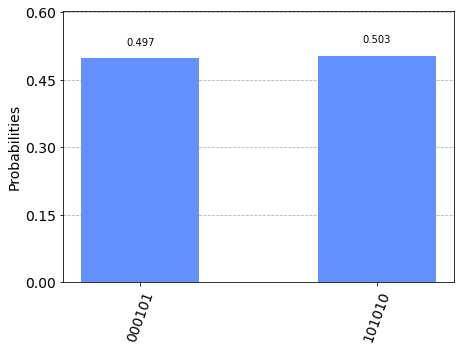

In [30]:
shots = 1024
backend = Aer.get_backend('qasm_simulator')
counts = execute(grover, backend=backend, shots=shots).result().get_counts(grover)
plot_histogram(counts)